In [19]:
from optimization import optimize
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from oracle import Oracle, make_oracle
import seaborn as sns
from typing import List
from sklearn.linear_model import LogisticRegression

In [20]:
def optimize_sklearn(oracle):
    model = LogisticRegression(penalty="none", tol=1e-8, max_iter=10000, n_jobs=-1, fit_intercept=False)
    model.fit(oracle.X, oracle.Y.ravel())

    entropy_true = oracle.value(model.coef_.reshape(-1, 1))
    return entropy_true

In [21]:
def plot_vs_iter(data, true_ans: float, criteria: List[str], linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for crit in criteria:
        for ls in linesearch_methods:
            data_to_plot = data[(data["hf_criterion"] == crit) & (data["LineSearch"] == ls)]
            ax[0].plot(data_to_plot.num_iter, np.log10(np.abs(data_to_plot.entropy - true_ans)), label=f"{crit}: {ls}")
            ax[1].plot(data_to_plot.num_iter, np.log10(data_to_plot.rk), label=f"{crit}: {ls}")

    plt.suptitle(title, y=1.1)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Iteration number")
    ax[1].set_xlabel("Iteration number")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))
    plt.show()


def plot_vs_calls(data, true_ans: float, criteria: List[str], linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for crit in criteria:
        for ls in linesearch_methods:
            data_to_plot = data[(data["hf_criterion"] == crit) & (data["LineSearch"] == ls)]
            ax[0].plot(data_to_plot.oracle_calls, np.log10(np.abs(data_to_plot.entropy - true_ans)), label=f"{crit}: {ls}")
            ax[1].plot(data_to_plot.oracle_calls, np.log10(data_to_plot.rk), label=f"{crit}: {ls}")

    plt.suptitle(title, y=1.1)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Oracle call number")
    ax[1].set_xlabel("Oracle call number")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))
    plt.show()


def plot_vs_time(data, true_ans: float, criteria: List[str], linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for crit in criteria:
        for ls in linesearch_methods:
            data_to_plot = data[(data["hf_criterion"] == crit) & (data["LineSearch"] == ls)]
            ax[0].plot(data_to_plot.time, np.log10(np.abs(data_to_plot.entropy - true_ans)), label=f"{crit}: {ls}")
            ax[1].plot(data_to_plot.time, np.log10(data_to_plot.rk), label=f"{crit}: {ls}")

    plt.suptitle(title, y=1.1)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Time spent, s")
    ax[1].set_xlabel("Time spent, s")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))
    plt.show()

In [22]:
a1a = make_oracle("a1a.libsvm")
true_ans = optimize_sklearn(a1a)

In [23]:
sns.set()
sns.set_context("talk")
linesearch_methods = ["golden_section", "brent", "armijo"]
criteria = ["num2006", "tol", "norm"]

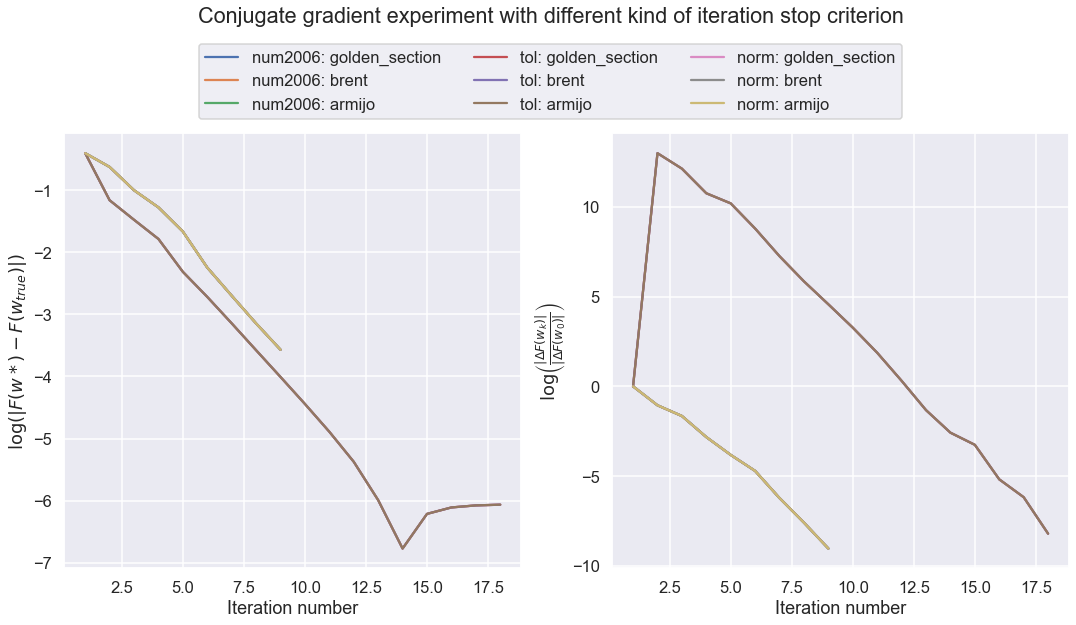

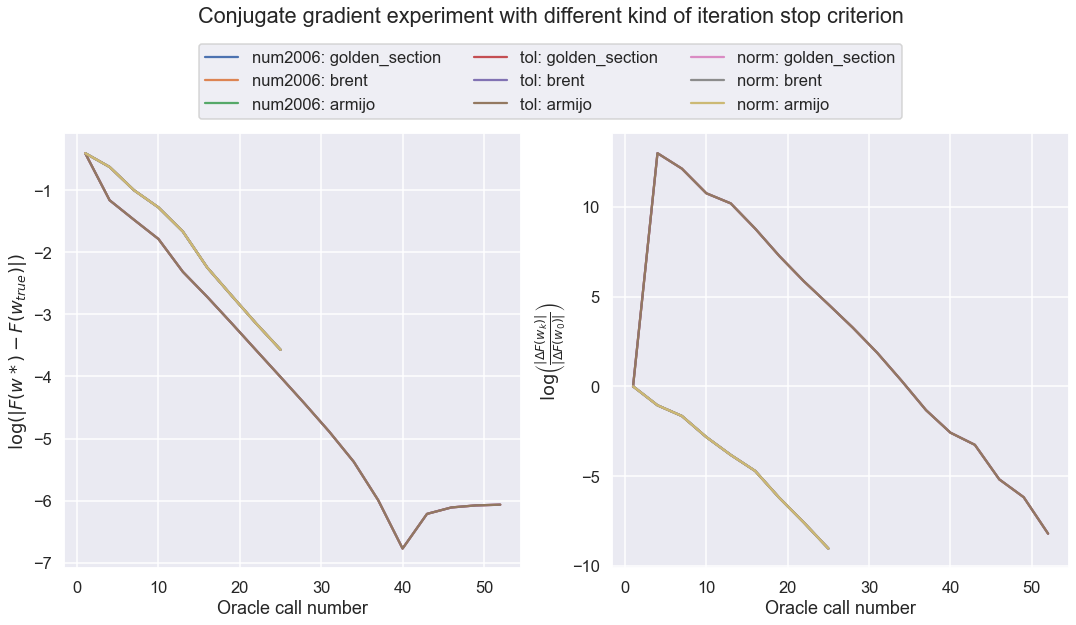

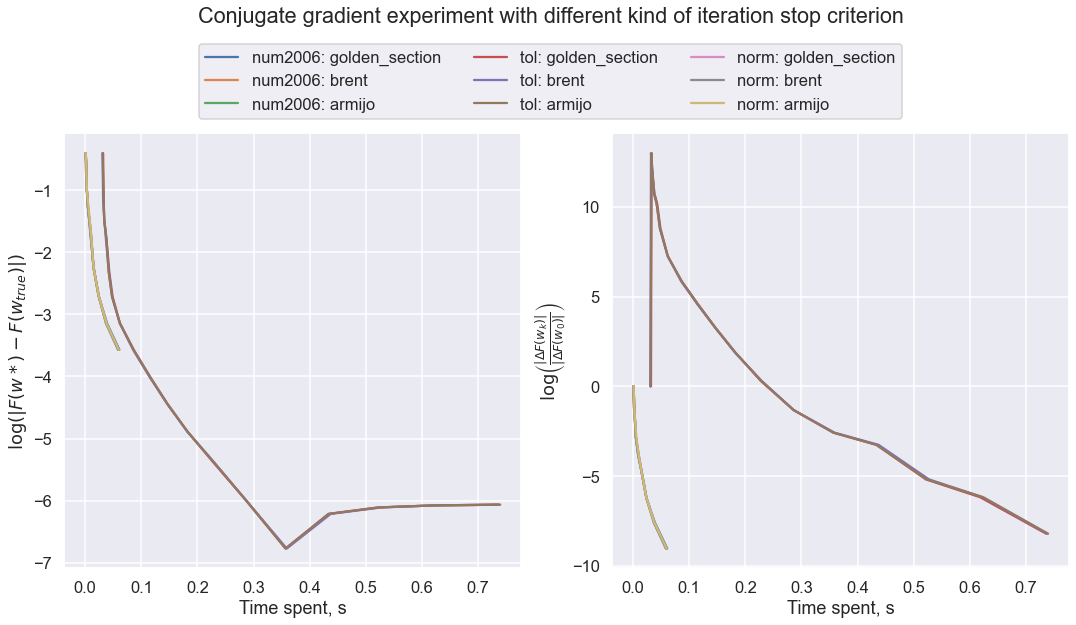

In [24]:
data = pd.read_csv("data/hf_exp.csv")
plot_vs_iter(data, true_ans, criteria, linesearch_methods, "Conjugate gradient experiment with different kind of iteration stop criterion")
plot_vs_calls(data, true_ans, criteria, linesearch_methods, "Conjugate gradient experiment with different kind of iteration stop criterion")
plot_vs_time(data, true_ans, criteria, linesearch_methods, "Conjugate gradient experiment with different kind of iteration stop criterion")

Стоит сначала отдельно указать, что на графиках представлены только отличающие друг от друга критерии, т.е. по результатам критерий остановки по норме градиента $|\nabla f|$ и по $\min(0.5, \sqrt{|\nabla f|})|\nabla f|$ совпадают. Так же для чистоты результатов приведены данные для трех различных методов поиска альфы.

Стоит отметить, что, по крайней мере для **а1а** датасета, что метод сопряженных градиентов, что метод Ньютона полностью используют стартовую альфу, равную $1$, т.е. такие шаги у них всегда удовлетворяю условию Армихо, поэтому, по сути, здесь представлены графики по Армихо, так как остальные методы линейного поиска реально не приминялись по самой сути алгоритма.